In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
### Looking At the top 5 rows of the data
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


THere are lot's of NaN Values Let's see All of them

In [4]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

There are Lot's of values in locationa and keyword and we don't even required them so we will drop them and Choose only text and target column

In [5]:
df = df[['text','target']]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df.isna().sum()

text      0
target    0
dtype: int64

In [7]:
df.tail()

,text,target
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1
7612,The Latest: More Homes Razed by Northern Calif...,1


Let's Visulize the target Column using the seaborn countplot 

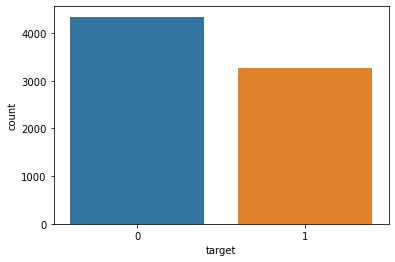

In [8]:
sns.countplot("target",data=df);

Dataset is Balanced so We Don't have to Perform any type of sampling.

## Cleaning

In [9]:
## Let's see some tweets
df['text'][2],df['text'][500],df['text'][100]

("All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 'Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/LHBZHWq4B9',
 '.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad')

```
We can see that we have so much useless data to remove it 

we need to clean the data

for cleaning we are going to use `re` (regex) 

process : 
    1. Lower Casing: Each text is converted to lowercase.
    2. Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".
    3. Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")
    4. Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")
    5. Removing Non-Alphabets: [^a-zA-z]
    6. Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
    7. Removing Short Words: Words with length less than 2 are removed.
    8. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
    9. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)


    
```

In [10]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordLemm = WordNetLemmatizer()

In [12]:
########### SAMPLE TWITTS CLEANING FOR INDEX 200 #############
import re
## lower casing
text = df["text"][200].lower()
### Replacing URL
text = re.sub(URLPATTERN,' URL',text)
### Replacing EMOJI
for emoji in EMOJIS.keys():
    text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
### Replacing USER pattern
text = re.sub(USERPATTERN,' URL',text)
### Removing non-alphabets
text = re.sub('[^a-zA-z]'," ",text)
### Removing consecutive letters
text = re.sub(SEQPATTERN,SEQREPLACE,text)
text = text.split()
text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
text = ' '.join(text)
text

'happening hatzolah em ambulance responding dual siren URL'

In [13]:
length = len(df['text'])
length

7613

In [14]:
import time
t = time.time()
corpus = []
for i in range(0,length):
    ## lower casing
    text = df["text"][i].lower()
    ### Replacing URL
    text = re.sub(URLPATTERN,' URL',text)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    ### Replacing USER pattern
    text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    text = re.sub(SEQPATTERN,SEQREPLACE,text)
    text = text.split()
    text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    text = ' '.join(text)
    corpus.append(text)
print(f'Time Taken: {round(time.time()-t)} seconds')

Time Taken: 27 seconds


In [15]:
corpus

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update california hwy closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'top hill see fire wood',
 'emergency evacuation happening building across street',
 'afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding',
 'raining flooding florida tampabay tampa day lost count',
 'flood bago myanmar arrived bago',
 'damage school bus multi car crash breaking',
 'man',
 'love fruit',
 'summer lovely',
 'car fast',
 'gooaal',
 'ridiculous',
 'london cool EMOJIwink',
 'love skiing',
 'wonderful day',

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X_tfid = tfid.fit_transform(corpus).toarray()

In [17]:
y = df['target']
y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [18]:
############### Splitting The Dataset ###########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfid, y, test_size=0.20, random_state=0)

In [19]:
X_train.shape

(6090, 5000)

In [20]:
len(X_train),len(X_test)

(6090, 1523)

## Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB
model_cv = MultinomialNB().fit(X_train, y_train)
y_pred=model_cv.predict(X_test)
print(np.array(y_pred))

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[0 0 1 ... 1 0 1]
[[811  75]
 [230 407]] 79.97373604727511


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7984241628365069

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train, y_train)

y_pred=lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8089297439264609

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

lr=LogisticRegression()

kfold=KFold(n_splits=5, random_state=42, shuffle=True)
cv_results = cross_val_score(lr, X_tfid, y, cv=kfold, scoring='accuracy',)   # in case cv value is interger, it will automaticallu take KFold or StratifiedKFold 
cv_results.mean()

0.8045426974736045

In [27]:
from sklearn.model_selection import RandomizedSearchCV
params= {'C': [0.001, 0.01, 0.1, 1, 10, 100, ] , 'penalty':['l1','l2']}
RS_lr = RandomizedSearchCV(lr,params,return_train_score=True,error_score=0,random_state=42,cv=kfold)
RS_lr.fit(X_train, y_train)

print(RS_lr.best_estimator_)
print(RS_lr.best_params_)
print(RS_lr.best_score_)

LogisticRegression(C=1)
{'penalty': 'l2', 'C': 1}
0.8


In [28]:
from sklearn.model_selection import GridSearchCV
GS_lr=GridSearchCV(lr, params,cv=kfold)
GS_lr.fit(X_train, y_train)

print(GS_lr.best_estimator_)
print(GS_lr.best_params_)
print(GS_lr.best_score_)

LogisticRegression(C=1)
{'C': 1, 'penalty': 'l2'}
0.8


In [29]:
prediction = GS_lr.predict(X_test)
accuracy_score(y_test,prediction)

0.8089297439264609

### Test Data

In [30]:
test = pd.read_csv("data/test.csv",usecols=['text','id'])
test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [31]:
len(test)

3263

In [32]:
import time
t = time.time()
corpus = []
length = len(test)
for i in range(0,length):
    ## lower casing
    text = test["text"][i].lower()
    ### Replacing URL
    text = re.sub(URLPATTERN,' URL',text)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    ### Replacing USER pattern
    text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    text = re.sub(SEQPATTERN,SEQREPLACE,text)
    text = text.split()
    text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    text = ' '.join(text)
    corpus.append(text)
print(f'Time Taken: {round(time.time()-t)} seconds')

Time Taken: 11 seconds


In [33]:
X_tfid = tfid.fit_transform(corpus).toarray()

In [34]:
prediction = GS_lr.predict(X_tfid)
print(prediction)

[0 0 1 ... 0 1 1]


In [35]:
submission=pd.DataFrame()
submission['id']=test['id']
submission['target'] = prediction
submission


,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,1


In [36]:
submission.to_csv('data/submission.csv', index=False)

## Please UpVote The Notebook if You Liked It 🔼